# Ford GoBike Data Exploration 
## by Mayssa Soussia 

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load dataset in a pandas dataframe
GoBike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(GoBike_df.shape)
print(GoBike_df.dtypes)
display(GoBike_df.head(10))

(63377, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    float64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902.0,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535.0,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905.0,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638.0,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898.0,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200.0,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803.0,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329.0,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548.0,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488.0,Subscriber,1992.0,Male,No


In [4]:
#print data info
GoBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63377 entries, 0 to 63376
Data columns (total 16 columns):
duration_sec               63377 non-null int64
start_time                 63377 non-null object
end_time                   63377 non-null object
start_station_id           63294 non-null float64
start_station_name         63294 non-null object
start_station_latitude     63377 non-null float64
start_station_longitude    63377 non-null float64
end_station_id             63293 non-null float64
end_station_name           63293 non-null object
end_station_latitude       63376 non-null float64
end_station_longitude      63376 non-null float64
bike_id                    63376 non-null float64
user_type                  63376 non-null object
member_birth_year          60687 non-null float64
member_gender              60687 non-null object
bike_share_for_all_trip    63376 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 7.7+ MB


#### Issues in the dataset 

1. Multiple columns contain nan values, we will drop them and proceed only with rows that contain valid values for all columns.  
2. Columns that need to be converted into the right data type: 
 * start_time and end_time to be converted into datetime. 
 * start_station_id, end_station_id and bike_id to be converted to integer. 
 * user_type, member_gender, bike_share_for_all_trip to be converted into category. 


In [5]:
#Drop the rows with nan values
GoBike_df  = GoBike_df.dropna()
GoBike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60606 entries, 0 to 63375
Data columns (total 16 columns):
duration_sec               60606 non-null int64
start_time                 60606 non-null object
end_time                   60606 non-null object
start_station_id           60606 non-null float64
start_station_name         60606 non-null object
start_station_latitude     60606 non-null float64
start_station_longitude    60606 non-null float64
end_station_id             60606 non-null float64
end_station_name           60606 non-null object
end_station_latitude       60606 non-null float64
end_station_longitude      60606 non-null float64
bike_id                    60606 non-null float64
user_type                  60606 non-null object
member_birth_year          60606 non-null float64
member_gender              60606 non-null object
bike_share_for_all_trip    60606 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 7.9+ MB


In [6]:
# Conversion of columns into the right data types
GoBike_df['start_time'] = pd.to_datetime(GoBike_df['start_time'])
GoBike_df['end_time'] = pd.to_datetime(GoBike_df['end_time'])
GoBike_df[['start_station_id','end_station_id', 'bike_id']] = GoBike_df[['start_station_id', 
                                                                          'end_station_id', 'bike_id']].astype(int)
GoBike_df[['user_type','member_gender','bike_share_for_all_trip']]= GoBike_df[['user_type','member_gender',
                                                                               'bike_share_for_all_trip']].astype('category')

In [7]:
GoBike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60606 entries, 0 to 63375
Data columns (total 16 columns):
duration_sec               60606 non-null int64
start_time                 60606 non-null datetime64[ns]
end_time                   60606 non-null datetime64[ns]
start_station_id           60606 non-null int64
start_station_name         60606 non-null object
start_station_latitude     60606 non-null float64
start_station_longitude    60606 non-null float64
end_station_id             60606 non-null int64
end_station_name           60606 non-null object
end_station_latitude       60606 non-null float64
end_station_longitude      60606 non-null float64
bike_id                    60606 non-null int64
user_type                  60606 non-null category
member_birth_year          60606 non-null float64
member_gender              60606 non-null category
bike_share_for_all_trip    60606 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(4), object(2)
memory usage

In [8]:
GoBike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,60606.000000,60606.000000,60606.000000,60606.000000,60606.000000,60606.000000,60606.000000,60606.000000,60606.000000
mean,709.342260,138.626605,37.771395,-122.352916,136.552520,37.771542,-122.352606,4880.172590,1984.783833
std,1587.545859,112.352384,0.099657,0.117000,111.928973,0.099570,0.116679,1576.345487,10.200268
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411738,4547.000000,1980.000000
50%,515.000000,102.000000,37.780760,-122.398285,99.000000,37.780955,-122.398279,5271.000000,1987.000000
75%,798.000000,239.000000,37.797280,-122.287610,238.000000,37.797280,-122.288665,6035.000000,1992.000000
max,83195.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6644.000000,2001.000000


In [9]:
GoBike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### What is the structure of your dataset?

> There are 60606 records in the dataset with 16 columns (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

> Half of the variables are numeric while the rest of them fall in the object and category types.  

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the duratin variable. In the next cells. i will try to answer these questions. 
  >1. Is the bike sharing system used mostly for short or long distances ?   
  >2. What features are best for predicting the variable of interest ?
  >3. In which part of the day, the bike sharing syste is mostly used ?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that user_type and member_gender will have the strongest effect on duration as well as the member_birth_year. It is also worth investigating if the duration gets longer or shorter from a specific station or  when sharing or not. In other words, explore the start_station_id, and bike_share_for_all_trip.

## Univariate Exploration

In [10]:
#descriptive statistics for the numeric variable duration_sec
GoBike_df.duration_sec.describe()

count    60606.000000
mean       709.342260
std       1587.545859
min         61.000000
25%        325.000000
50%        515.000000
75%        798.000000
max      83195.000000
Name: duration_sec, dtype: float64

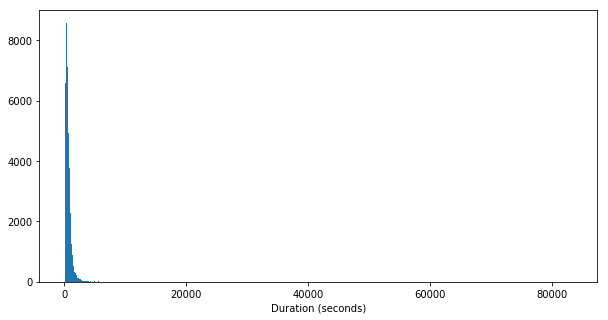

In [11]:
# Looking to the main variable of interest: duration_sec
binsize = 100
bins = np.arange(50, GoBike_df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = GoBike_df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (seconds)')
plt.show()

>The duration distribution according to this chart is highly skewed to the right. We notice that most of the values are in the range between 50 and 8000. We'll compute another plot using the log scale in order to see better the variable distribution.  

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


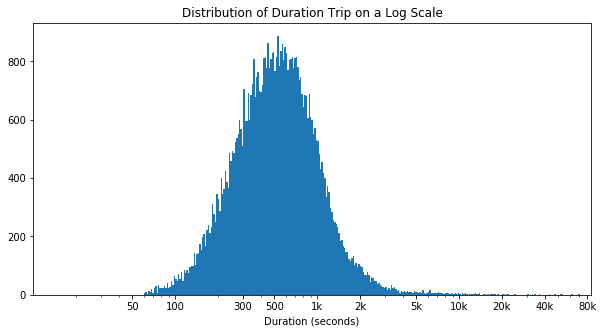

In [12]:

log_binsize = 0.01
bins = 10 ** np.arange(1, np.log10(GoBike_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = GoBike_df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Duration Trip on a Log Scale')
plt.xlabel('Duration (seconds)')
plt.xscale('log')
plt.xticks([50, 100, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4],
           [50, 100,  300, 500, '1k', '2k', '5k', '10k', '20k', '40k','80k'])
plt.xlim([0, 85000])
plt.show()


>With the log transformation, we can easily depict the normal distribution of the duration variable. Most of the observations are between 300s (5min) and 1000s (~16min) and cluster around the central peak 500s (~8min)

### Plotting categorical variables 

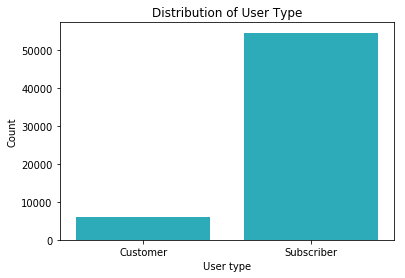

In [13]:
# plotting user_type distribution
base_color = sb.color_palette()[9]

fig = sb.countplot(data=GoBike_df, x='user_type', color=base_color);
plt.title('Distribution of User Type')
plt.xlabel('User type')
plt.ylabel('Count')
plt.show()

>The subscriber type is over 50000 while the customer type is around only 6000. it is about 1/8 ratio. 

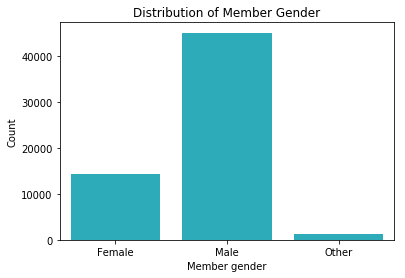

In [14]:
# plotting member_gender distribution
fig = sb.countplot(data=GoBike_df, x='member_gender', color=base_color);
plt.title('Distribution of Member Gender')
plt.xlabel('Member gender')
plt.ylabel('Count')
plt.show()

> Male is the gender the most using bike sharing system with a count around 45000 while females count is almost the third with a value equal to 14228 (F = 1/3 M). 

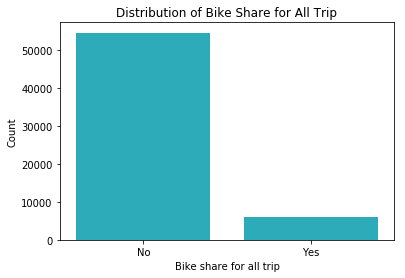

In [15]:
# plotting bike_share_for_all_trip distribution

fig = sb.countplot(data=GoBike_df, x='bike_share_for_all_trip', color=base_color);
plt.title('Distribution of Bike Share for All Trip')
plt.xlabel('Bike share for all trip')
plt.ylabel('Count')
plt.show()

> We can notice from this chart that most users doesn't use the bike share for the whole trip. 

#### Plotting numeric variables

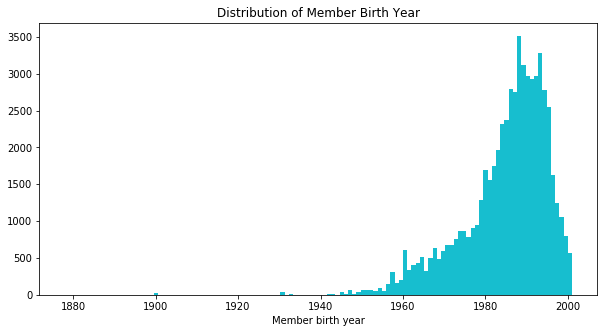

In [16]:
# plotting member_birth_year on a standard scale 
bins = 120
#bins = np.arange(1800, GoBike_df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = GoBike_df, x = 'member_birth_year', bins = bins, color = base_color)
plt.xlabel('Member birth year')
plt.title('Distribution of Member Birth Year')
plt.show()

> The distribution of "member_birth_year" is skewed to the left, most of the bike users are millenials (born between 1980 and 2000).

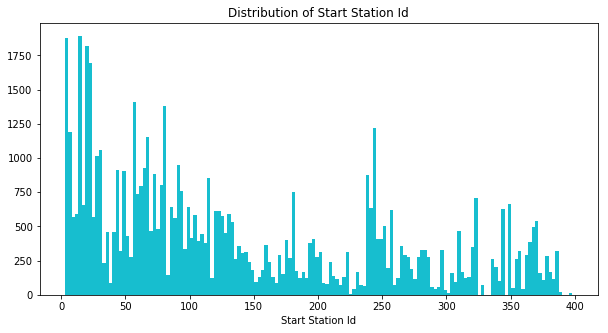

In [17]:
# plotting start_station_id on a standard scale
bins = 150

plt.figure(figsize=[10, 5])
plt.hist(data = GoBike_df, x = 'start_station_id', bins = bins,color = base_color)
plt.xlabel('Start Station Id')
plt.title('Distribution of Start Station Id')
plt.show()

In [18]:
Ids = GoBike_df.start_station_id.value_counts().index[:5]
# Return the records with highest frequency of start_station_id
GoBike_df.loc[Ids]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
58,120,2019-02-28 23:34:58.986,2019-02-28 23:36:59.378,140,Cesar Chavez St at Dolores St,37.747858,-122.424986,138,Jersey St at Church St,37.750900,-122.427411,5518,Subscriber,1981.0,Male,No
67,681,2019-02-28 23:19:37.366,2019-02-28 23:30:58.862,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,70,Central Ave at Fell St,37.773311,-122.444293,6333,Subscriber,1959.0,Male,No
81,294,2019-02-28 23:15:21.113,2019-02-28 23:20:15.798,356,Valencia St at Clinton Park,37.769188,-122.422285,58,Market St at 10th St,37.776619,-122.417385,5938,Subscriber,1992.0,Female,No
21,414,2019-02-28 23:50:26.879,2019-02-28 23:57:21.130,163,Lake Merritt BART Station,37.797320,-122.265320,221,6th Ave at E 12th St (Temporary Location),37.794396,-122.253842,6007,Subscriber,1984.0,Male,Yes
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


>The start_station_id chart doesn't follow a specific distribution. It is fluctuationg among all Ids. Some stations are way more frequented than others such as Cesar Chavez St (Id 140), San Francisco Public Library (Id 43), Valencia St (Id 356), Lake Merritt BART (Id 163),etc. This is probably due to their location, either near colleges and libraries or in downtown where users tend to need more the bike sharing system. 

#### Creating a new column 
Now I am interested to look to which part of the day bike share system is mostly started, for this matter, I will extract the hours from start_time and create a new column called 'part_of_the_day' which values are morning (5am to 12pm), afternoon(12pm to 5pm), evening (5pm to 9pm) and night (9pm tp 4am ). 

In [19]:
#Extract the hours from start_time column
hours = GoBike_df['start_time'].dt.hour

# create a list of our conditions
conditions = [
    (hours >= 5 ) & (hours < 12),
    (hours >= 12) & (hours < 17),
    (hours >= 17 ) & (hours < 21),
    (hours >= 21) | (hours <= 4),
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'afternoon', 'evening', 'night']

# create a new column and use np.select to assign values to it using our lists as arguments
GoBike_df['part_of_the_day'] = np.select(conditions, values)

# display updated DataFrame
GoBike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,part_of_the_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,night


In [20]:
# Set the new colum type to category
GoBike_df['part_of_the_day'] = GoBike_df['part_of_the_day'].astype('category')

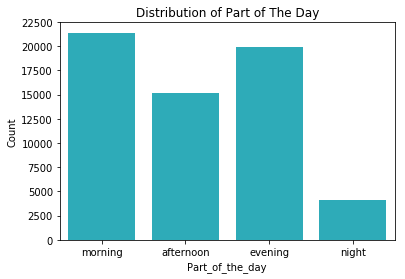

In [21]:
#Plot the distribution of the part_of_day_column 

gen_order= ['morning', 'afternoon', 'evening', 'night']

fig = sb.countplot(data=GoBike_df, x='part_of_the_day', color=base_color, order = gen_order);
plt.title('Distribution of Part of The Day')
plt.xlabel('Part_of_the_day')
plt.ylabel('Count')
plt.show()

>The bike sharing is mostly used during the morning which is expected as most of th people by then go to work or study. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable distribution looked very stacked at first, so I used a log scale. Under the transformation, the data looked different where the distribution followed a normal curve.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Among the investigated features, the start_station_id had a fluctuating distribution rather than unusual which is completely normal as Ids don't necessarly follow a specific pattern such as age or gender.  

> I performed a transfomation on the data by creating a new column called "part_of_the_day" based on the "start_time" column where I extracted the hours to create new values: morning, afternoon, evening and night. The purpose is to investigate in which part of the day the bike sharing system is used most and further study the relationship between this new variable and the variable of interest (duration).

## Bivariate Exploration


#### Relation with categorical variables 

In [22]:
# compute the logarithm of duration 
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

GoBike_df['log_duration_sec'] = GoBike_df['duration_sec'].apply(log_trans)

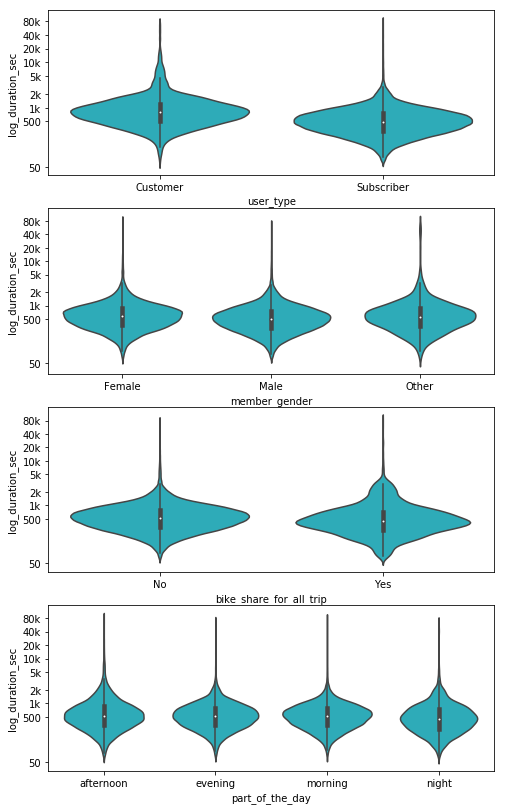

In [23]:
# In this part, I will explore the duration_sec by user_type, gender and bike_share_for_all_trip 
#which means plotting the numeric variable duration_sec against the categorical variables. 

categoric_vars = ['user_type','member_gender','bike_share_for_all_trip','part_of_the_day']

fig, ax = plt.subplots(ncols = 1, nrows = 4 , figsize = [8,14])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = GoBike_df, x = var, y = 'log_duration_sec', ax = ax[i],color = base_color)
    ax[i].set_yticks(log_trans(np.array([50, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4])))
    ax[i].set_yticklabels([50, 500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.show()


>The representation in a log scale of duration in seconds against categorical variables is quite similar for each variable. For instance, the duration between customers and subscribers as well as between males and females are much alike with an average falling between 500 and 1000s. We don't also see much of a difference in the plots of bike share and part of the day. In other words, whether users are using the bike the entire trip or not, the duration is not much affected with an average close to 500s. On the other hand, violin plot of the morning value is slightly wider than the others. Overall, we don't see that categorical variables affect duration in an impactful way.    

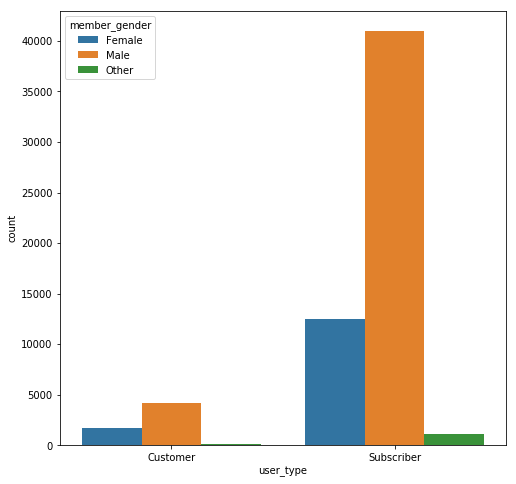

In [24]:
#plot user_type vs member_gender
plt.figure(figsize = [8, 8])
sb.countplot(data = GoBike_df, x = 'user_type', hue = 'member_gender')

> We notice from this chart that male customers are almost the double of female customers while for the subscribers , male users are almost the triple of female users. 

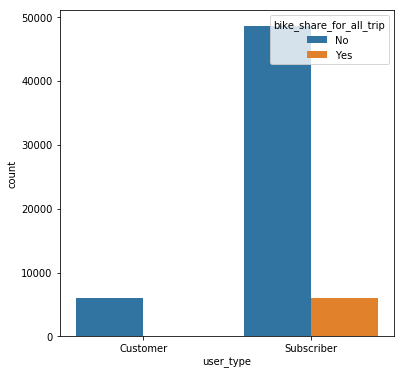

In [25]:
#plot user_type vs bike_share_for_all_trip
plt.figure(figsize = [6,6])
sb.countplot(data = GoBike_df, x = 'user_type', hue = 'bike_share_for_all_trip')

>According to this plot, all the users that share bike for all trip are only subscribers and none of them is a customer. 

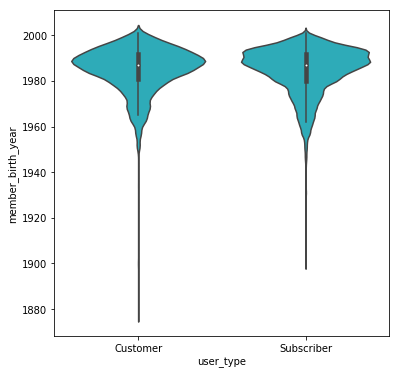

In [26]:
#plot user_type vs member_birth_year

ax = plt.figure(figsize = [6,6])

sb.violinplot(data = GoBike_df, x = 'user_type', y = 'member_birth_year',color = base_color)
plt.show()



>The violin plots of birth_year vs user_type are quite similar. The one for the customer value is slightly wider around the average (~1990) while the violin plot of the subscriber value gets a little widerthan the other between the years 1960 and 1980. 

#### Relation with numeric variable

In [ ]:
# Scatter plot of birth_year vs duration
plt.figure(figsize = [8, 6])
plt.scatter(data = GoBike_df, x = 'member_birth_year', y = 'duration_sec', s = 30 , alpha = 0.09, color = base_color) 
#plt.xlim([0, 3.5])
plt.xlabel('member_birth_year')
plt.yscale('log')
plt.yticks([50, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [50, 500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.ylabel('Duration (seconds)')
plt.show()

>There is a moderate positive correlation between birth year and duration. The duration increases when age of users gets younger. However, in the range of 1960 and 2000 vs 100s and 2000s, there is a high overlap of data points.  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I didn't depict a distinguished relationship between duration and categorical variables. The violin plots are quite similar among the values of each variable against duration. However, with the numeric variable birth_year (or age), there is moderate positive correlation with the variable of interest.,

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The variable bike_share_for_all_trip has only two values 'yes' and 'no' and when plotted against user_type, we notice that all 'yes' values are only present among subscribers. 

## Multivariate Exploration

In [ ]:
# plot duration vs member_birth_year and member_gender
g = sb.FacetGrid(data = GoBike_df, hue = 'member_gender', size = 6)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend()
plt.yscale('log')
plt.yticks([50, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [50, 500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.ylabel('Duration (seconds)')

> There is a huge overlap of data points in this chart amking it difficult to distinguish between gender values so I will proceed with distinct plots for each value. 

In [ ]:
g = sb.FacetGrid(data = GoBike_df, col = 'member_gender', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'member_birth_year','log_duration_sec', s = 30, alpha = 0.5)

>The trend is almost the same between males and females, both have moderate positive relationship with duration. However with the 'other' value, the positive correlation is not very clearly observed.

In [ ]:
# plot duration vs member_birth_year and user_type

g = sb.FacetGrid(data = GoBike_df, col = 'user_type', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'member_birth_year','log_duration_sec', s = 30, alpha = 0.5)
g.add_legend()

> We got a moderate positive correlation for both values of user_type.  

In [ ]:
# plot duration, gender and user_type
g = sb.FacetGrid(data = GoBike_df, col = 'member_gender', size = 4)
g.map(sb.violinplot, 'user_type', 'log_duration_sec')

> The violin plots of user_type are not very variying among gender. We always see for the customer type a wide range around the averag (~1000 s = 3 in log scale) and it gets thinner with higher and lower values, while for the subscriber type, the average is always slighter smaller with a value around 500s (= 2,6in log scale) 

In [ ]:
# plot duration, user_type and part_of_the_day
g = sb.FacetGrid(data = GoBike_df, col = 'user_type', size = 4)
g.map(sb.violinplot, 'part_of_the_day', 'log_duration_sec', order = gen_order)

> In this chart, we can see that the violin plot of "morning" value is the widest for both customer and subscriber with an average duration around 900s(= 2.9 in log scale) for customers and 500s for subscribers. These latter tend to stay shorter in their trips during the morning.

## Conclusions
> Going through all the analysis, we can recap that categorical variables, specifically, in the bivariate analysis, didn't seem to be very impactful on the feature of interest. However, there was a moderate positive correlation between duration and the numeric variable member_birth_year. In the multivariate analysis, some variations in the duration were spotted between customers and subscribers where subscribers trips are usually shorter and tend to use more the sharing system during afternoon and evening. 
